# Lab 1

## Markdown Cells

This is a [Markdown](https://en.wikipedia.org/wiki/Markdown) cell. You can use them to write *nicely* formatted text, describing what you are doing in the Jupyter notebook.

In [1]:
''' 
Let's import the Python modules we'll need for this example!
This normally goes at the top of your script or notebook, so that all code below it can see these packages.

By the way, the triple-quotes give you blocks of comments
'''
# while the pound (or hash) symbol just comments things

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Let's read some data in

# file from: http://ds.iris.edu/ds/products/emc-prem/
# based on Dziewonski & Anderson (1981) http://adsabs.harvard.edu/abs/1981PEPI...25..297D
file = 'PREM_1s.csv'
radius, density = np.loadtxt(file, delimiter=',', usecols=(0,2), comments='#', unpack=True)

In [3]:
radius

array([ 6371. ,  6370. ,  6369. ,  6368. ,  6368. ,  6367. ,  6366. ,
        6365. ,  6364. ,  6363. ,  6362. ,  6361. ,  6360. ,  6359. ,
        6358. ,  6357. ,  6356. ,  6356. ,  6355. ,  6354. ,  6353. ,
        6352. ,  6351. ,  6350. ,  6349. ,  6348. ,  6346.6,  6346.6,
        6346. ,  6345. ,  6344. ,  6343. ,  6342. ,  6341. ,  6340. ,
        6339. ,  6338. ,  6337. ,  6336. ,  6331. ,  6326. ,  6321. ,
        6311. ,  6301. ,  6291. ,  6291. ,  6281. ,  6271. ,  6261. ,
        6251. ,  6241. ,  6231. ,  6221. ,  6211. ,  6201. ,  6191. ,
        6181. ,  6171. ,  6161. ,  6151. ,  6151. ,  6141. ,  6131. ,
        6121. ,  6111. ,  6101. ,  6091. ,  6081. ,  6071. ,  6061. ,
        6051. ,  6041. ,  6031. ,  6021. ,  6011. ,  6001. ,  5991. ,
        5981. ,  5971. ,  5971. ,  5961. ,  5951. ,  5941. ,  5931. ,
        5921. ,  5911. ,  5901. ,  5891. ,  5881. ,  5871. ,  5861. ,
        5851. ,  5841. ,  5831. ,  5821. ,  5811. ,  5801. ,  5791. ,
        5781. ,  577

In [4]:
density

array([  1.02   ,   1.02   ,   1.02   ,   1.02   ,   2.6    ,   2.6    ,
         2.6    ,   2.6    ,   2.6    ,   2.6    ,   2.6    ,   2.6    ,
         2.6    ,   2.6    ,   2.6    ,   2.6    ,   2.6    ,   2.9    ,
         2.9    ,   2.9    ,   2.9    ,   2.9    ,   2.9    ,   2.9    ,
         2.9    ,   2.9    ,   2.9    ,   3.38075,   3.38068,   3.38057,
         3.38047,   3.38036,   3.38025,   3.38014,   3.38003,   3.37992,
         3.37981,   3.3797 ,   3.3796 ,   3.37905,   3.37851,   3.37797,
         3.37688,   3.37579,   3.37471,   3.37471,   3.37362,   3.37253,
         3.37145,   3.37036,   3.36927,   3.36818,   3.3671 ,   3.36601,
         3.36492,   3.36384,   3.36275,   3.36166,   3.36058,   3.35949,
         3.43577,   3.44175,   3.44772,   3.45369,   3.45966,   3.46563,
         3.4716 ,   3.47758,   3.48355,   3.48952,   3.49549,   3.50146,
         3.50743,   3.51341,   3.51938,   3.52535,   3.53132,   3.53729,
         3.54326,   3.72375,   3.73635,   3.74895, 

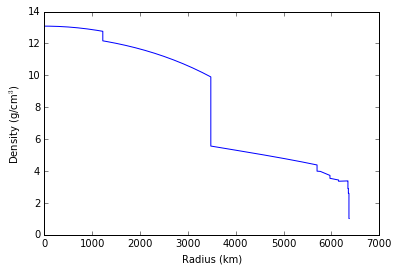

In [5]:
# Now let's plot these data
plt.plot(radius, density)
plt.xlabel('Radius (km)')
plt.ylabel('Density (g/cm$^3$)')

## Goal:
At what radial step do you enclose half of the Earth's mass?

We all know the formula for the mass of a sphere:
$ M = \frac{4}{3} \pi R^3 \times \rho $

Note that the density here is provided in *shells* of radius, so you need to add them as you go.

$ M_i = \frac{4}{3} \pi (R_{i+1}^3 - R_i^3) \times \rho_i $


In [190]:
siz=np.size(density)
n=np.zeros(np.size(density+1))

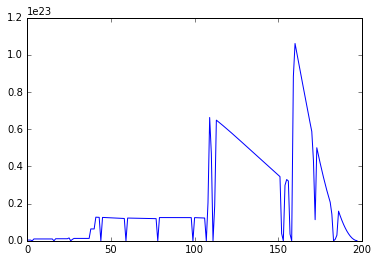

In [222]:
for i in range(0,siz-1):
    n[i]=4/3*np.pi*((radius[i])**3-(radius[i+1])**3)*density[i]*1000*10**9
x=np.arange(0,198,1)
plt.plot(x,n[x])

In [223]:
k=np.zeros(siz)
for i in range(0,siz):
    k[i]=np.sum(n[0:i])


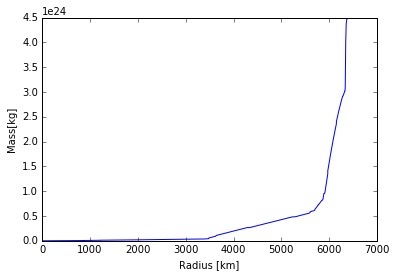

In [234]:
plt.plot(radius[::-1],k)
plt.xlabel('Radius [km]')
plt.ylabel('Mass[kg]')

In [216]:
for i in range(0,199):
    if k[i]<.5*k[198]:
        flag=False
    if k[i]>.5*k[198]:
        print radius[i]
        break

4435.7
